In [1]:
# IMPORT PACKAGES
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print("TF VERSION = ", tf.__version__)

/Users/nityansuman/anaconda3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


TF VERSION =  1.8.0


FASHION MNIST DATASET IS USED HERE. IT CONTAINS 70,000 IMAGES IN 10 CATAGORIES, EACH OF SIZE 28X28 PIXELS.

In [2]:
# LOAD THE DATA
fashion_data = keras.datasets.fashion_mnist

In [3]:
# HERE 60K IMAGES ARE SET FOR TRAIN AND OTHER 10K FOR TEST
(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()

In [4]:
# LETS VIEW OUR DATASET
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
# CATEGORY LABELS SINCE THE DATA HAS ONLY CODES
# I GOT THESE LABELS FORM INTERNET, ITS NOT RANDOMLY ASSIGNED
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

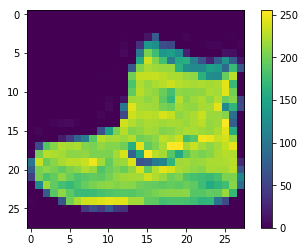

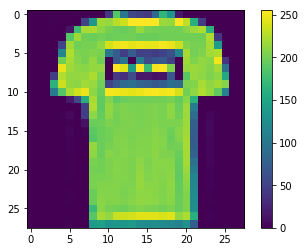

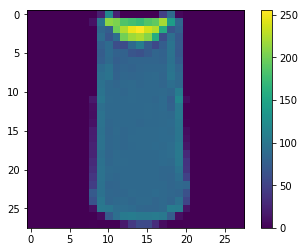

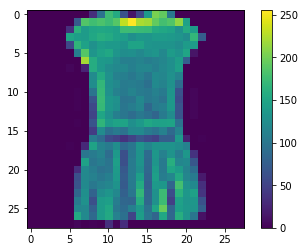

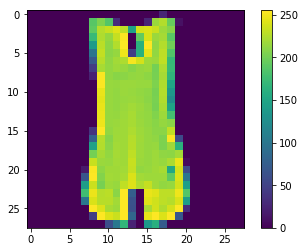

In [6]:
# VIEW THE FIRST 5 IMAGEs IN TRAIN DATA
for i in range(5):
    plt.figure()
    plt.imshow(train_images[i])
    plt.colorbar()

NORMALISE THE PIXEL VALUES USING MEAN NORMALISATION METHOD

In [7]:
# PERFORM NORMALIZATION ON IMAGE PIXELS
train_images = train_images / 255.0
test_images = test_images / 255.0

VIEW FIRST 8 IMAGES OF TAIN DATA

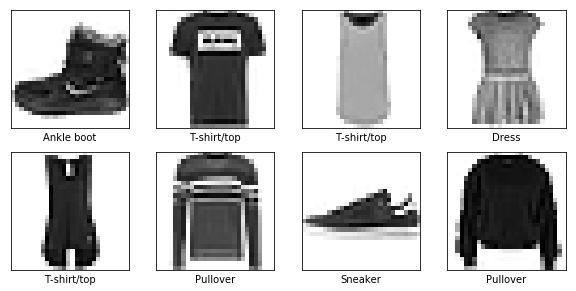

In [8]:
plt.figure(figsize=(10,10)) # set the firgure size 10x10 pixels

# plot first 25 images in training data
for i in range(8):
    plt.subplot(4, 4, i+1) # IDENTIFY THE PLOT
    plt.grid(False) # REMOVE GRIDS FORM THE IMAGES
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[train_labels[i]]) # GET THE CORRECT LABEL
    plt.imshow(train_images[i], cmap=plt.cm.binary) # CONVERT IMAGE TO GRAY SCALE

## Model - 1 : Deep Feed-Forward Neural Network (MULTI-LAYER PERCEPTRON)

In [9]:
# INPUT LAYER SIZE = 784 = SIZE OF THE IMAGE
# ONE HIDDEN LAYER = 128 NODES
# OUTPUT LAYER = 10 NODES

# DESIGN THE MODEL
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # FLATTEN THE IMAGE FROM 28X28 TO 784 VECTOR
    keras.layers.Dense(128, activation=tf.nn.relu), # RELU ACTIVATION FUNCTION
    keras.layers.Dense(10, activation=tf.nn.softmax) # SOFTMAX ACTIVATION FUNCTION
])

# COMPLILE THE MODEL
model.compile(optimizer=tf.train.AdamOptimizer(), # USE ADAPTIVE LEARNING RATE
             loss = keras.losses.sparse_categorical_crossentropy, # CATAGORICAL ENTROPY LOSS FUNCTION
             metrics=["accuracy"]) # USE CATAGORICAL ACCURACY

# FIT THE MODLE USING TRAINING DATA
# NUMBER OF ITERATIONS OVER THE TRAINING DATA = 5
# NUMBER OF IMAGES PER TRAINING = 32
model.fit(train_images, train_labels, epochs=5, batch_size=32)

# EVALUATE THE TRAINED MODEL ON TEST DATA
# EVALUATE RETURNS : LOSS AND METRICS SPECIFIED IN THE MODEL
model.evaluate(test_images, test_labels)

Epoch 1/5
60000/60000 [==============================] - 4s 65us/step - loss: 0.5009 - acc: 0.8253
Epoch 2/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.3750 - acc: 0.8667
Epoch 3/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.3366 - acc: 0.8781
Epoch 4/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.3120 - acc: 0.8848
Epoch 5/5
10000/10000 [==============================] - 0s 34us/step


[0.36309385554790496, 0.8705]

TEST ACCURACY IS LITTLE BIT LESS THAN TRAIN ACCURACY. MODEL IS OVERFITTED FOR SAY BUT NOT MUCH. IT IS ACCEPTABLE. OVERFITTING CAN BE HANDLED USING DIFFERENT MEHTODS LIKE DROPOUT AND EARLY STOPPING.

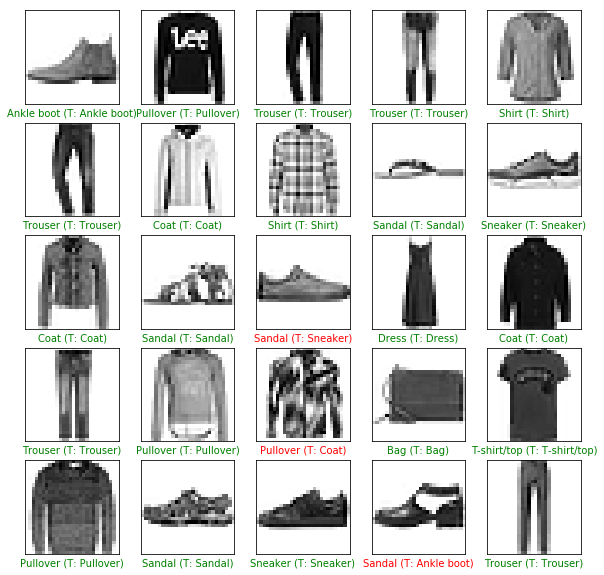

In [10]:
# GET THE PREDICTIONS DONE BY OUR MODEL
predictions = model.predict(test_images)

# LETS PLOT FIRST 25 IMAGES IN TEST WITH THEIR TRUE AND PREDICTED LABELS
plt.figure(figsize=(10,10)) # SET THE FIGURE SIZE
for i in range(25):
    plt.subplot(5, 5, i+1) # CREATE A SUBPLOT
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) # REMOVE GRIDS
    plt.imshow(test_images[i], cmap=plt.cm.binary) # CONVERT IMAGES TO GRAY SCALE
    predicted_label = np.argmax(predictions[i]) # GET THE PREDICTED LABEL: MAX PROBABILITY FROM 10 LABELS
    true_label = test_labels[i] # GET TRUE LABEL
    if predicted_label == true_label:
      c = "green" # MARK GREEN IF CORRECT PREDICTION
    else:
      c = "red" # RED OTHERWISE
    # DISPLAY
    plt.xlabel("{} (T: {})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=c)

THE MODEL IS VERY BASIC, YET WE HAVE ACHIEVED A VERY REPECTABLE SCORE ON BOTH TRAIN AND TEST DATA. THERE IS STILL LOT OF SCOPE FOR IMPROVEMENTS.

LET US HANDLE OVERFITTING USING DROPOUT TECHNIQUE.

#### ADDING DROPOUT TO HANDLE OVERFITTING

In [11]:
# BUILD NEW MODLE WITH DROPOUT TECHNIQUE
# WE ALSO DOUBLE THE ITERATIONS OVER THE DATASET SINCE WE DROP 50% OF THE NODES AT EVERY ITERATION

# DESIGN THE MODEL
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])

# COMPILE THE MODEL
model.compile(optimizer=tf.train.AdamOptimizer(), # USE ADAPTIVE LEARNING
             loss = keras.losses.sparse_categorical_crossentropy,
             metrics = ["accuracy"])


# FIT THE MODEL ON TRAIN DATA
model.fit(train_images, train_labels, epochs=10, batch_size=32)

# EVALUATE OUR MODEL ON TEST DATA
model.evaluate(test_images, test_labels)

Epoch 1/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.6141 - acc: 0.7832
Epoch 2/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.4707 - acc: 0.8282
Epoch 3/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.4401 - acc: 0.8406
Epoch 4/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.4221 - acc: 0.8471
Epoch 5/10
60000/60000 [==============================] - 4s 67us/step - loss: 0.4093 - acc: 0.8517
Epoch 6/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.3970 - acc: 0.8545
Epoch 7/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.3890 - acc: 0.8586
Epoch 8/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.3779 - acc: 0.8619
Epoch 9/10
60000/60000 [==============================] - 4s 74us/step - loss: 0.3761 - acc: 0.8623
Epoch 10/10
10000/10000 [==============================] - 0s 40us/step


[0.36085226358175276, 0.8722]

AS YOU CAN SEE, WE HAVE OVERCOME THE SITUATION WHERE OUR MODEL WAS OVERFITTED. TEST ACCURACY IS SLIGHTLY MORE THAN THE TRAIN ACCURACY.

LETS USE MULTIPLE DROPOUT RATES AND MONITOR FOR OVERFITTING AND ACCURACY

In [19]:
# DESIGN THE MODEL
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.7),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])

# COMPILE THE MODEL
model.compile(optimizer=tf.train.AdamOptimizer(), # USE ADAPTIVE LEARNING
             loss = keras.losses.sparse_categorical_crossentropy,
             metrics = ["accuracy"])


# FIT THE MODEL ON TRAIN DATA
model.fit(train_images, train_labels, epochs=10, batch_size=32)

# EVALUATE OUR MODEL ON TEST DATA
model.evaluate(test_images, test_labels)

Epoch 1/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.7678 - acc: 0.7253
Epoch 2/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.5955 - acc: 0.7832
Epoch 3/10
60000/60000 [==============================] - 5s 79us/step - loss: 0.5576 - acc: 0.7970
Epoch 4/10
60000/60000 [==============================] - 5s 78us/step - loss: 0.5338 - acc: 0.8051
Epoch 5/10
60000/60000 [==============================] - 5s 76us/step - loss: 0.5229 - acc: 0.8077
Epoch 6/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.5088 - acc: 0.8162
Epoch 7/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.5012 - acc: 0.8176
Epoch 8/10
60000/60000 [==============================] - 5s 83us/step - loss: 0.4943 - acc: 0.8180
Epoch 9/10
60000/60000 [==============================] - 5s 81us/step - loss: 0.4864 - acc: 0.8213
Epoch 10/10
10000/10000 [==============================] - 1s 67us/step


[0.3965288450479507, 0.8587]

In [20]:
# DESIGN THE MODEL
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])

# COMPILE THE MODEL
model.compile(optimizer=tf.train.AdamOptimizer(), # USE ADAPTIVE LEARNING
             loss = keras.losses.sparse_categorical_crossentropy,
             metrics = ["accuracy"])


# FIT THE MODEL ON TRAIN DATA
model.fit(train_images, train_labels, epochs=10, batch_size=32)

# EVALUATE OUR MODEL ON TEST DATA
model.evaluate(test_images, test_labels)

Epoch 1/10
60000/60000 [==============================] - 5s 82us/step - loss: 0.5562 - acc: 0.8028
Epoch 2/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.4217 - acc: 0.8488
Epoch 3/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.3864 - acc: 0.8608
Epoch 4/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.3657 - acc: 0.8653
Epoch 5/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.3516 - acc: 0.8711
Epoch 6/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.3395 - acc: 0.8746
Epoch 7/10
60000/60000 [==============================] - 4s 73us/step - loss: 0.3287 - acc: 0.8781
Epoch 8/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.3264 - acc: 0.8800
Epoch 9/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.3140 - acc: 0.8833
Epoch 10/10
10000/10000 [==============================] - 1s 56us/step


[0.33865634598732, 0.8817]

YOU CAN SEE THAT EVEN THOUGH THE MODEL IS NOT OVERFITTED, ACCURACY IS LOW THAT IS BECAUSE WE HAVE UNDERTRAINED OUR MODE. RIGHT NOW WE ARE USING A RANDOMLY TAKEN EPOCH, LET US NOT LIMIT THE EPOCHS AND STOP MODEL ONLY WHEN OVERFITTIGN IS OBSERVED.

In [21]:
# CREATE VALIDATION SET TO MONITOR VALIDATION LOSS SO THAT WE CAN STOP TRAINING IF WE OBSERV OVER FITTING
val_images = train_images[:10000]
val_labels = train_labels[:10000]

# UPDATE TRAIN DATA
train_images = train_images[10000:]
train_labels = train_labels[10000:]

In [22]:
# CREATE A CALLBACK WITH EARLY STOPPING PROPERTY TO STOP INCASE OF OVERFITTING
cbk = [
  # INTERRUPT TRAINING IF VALIDATION LOSS IS INCREASING OVER 3 EPOCHS
  keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
]

In [28]:
# USE CALLBACK WITH THE SECOND BEST MODEL OUT OF THE ABOVE
# DESIGN THE MODEL
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])

# COMPILE THE MODEL
model.compile(optimizer = tf.train.AdamOptimizer(), # USE ADAPTIVE LEARNING
              loss = keras.losses.sparse_categorical_crossentropy,
              metrics = ["accuracy"])

# FIT THE MODEL ON TRAIN DATA
model.fit(train_images, train_labels,
          epochs=100, # MAX EPOCH
          batch_size=32,
          callbacks=cbk,
          validation_data=(val_images, val_labels))

# EVALUATE OUR MODEL ON TEST DATA
model.evaluate(test_images, test_labels)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 103us/step - loss: 0.6358 - acc: 0.7743 - val_loss: 0.4240 - val_acc: 0.8443
Epoch 2/100
50000/50000 [==============================] - 4s 82us/step - loss: 0.4844 - acc: 0.8262 - val_loss: 0.3951 - val_acc: 0.8618
Epoch 3/100
50000/50000 [==============================] - 4s 78us/step - loss: 0.4487 - acc: 0.8374 - val_loss: 0.3747 - val_acc: 0.8644
Epoch 4/100
50000/50000 [==============================] - 4s 78us/step - loss: 0.4286 - acc: 0.8449 - val_loss: 0.3739 - val_acc: 0.8626
Epoch 5/100
50000/50000 [==============================] - 4s 82us/step - loss: 0.4170 - acc: 0.8474 - val_loss: 0.3519 - val_acc: 0.8690
Epoch 6/100
50000/50000 [==============================] - 4s 84us/step - loss: 0.4033 - acc: 0.8548 - val_loss: 0.3428 - val_acc: 0.8705
Epoch 7/100
50000/50000 [==============================] - 4s 86us/step - loss: 0.3923 - acc: 0.8572 - val_loss: 0.3461 -

[0.3653336204946041, 0.8732]

In [29]:
# NOW WE SET UP CALLBACK FOR THE BEST MODEL WHICH IS WITH 0.3 AS DROPOUT
# THE MODEL GAVE ABOUT 88% ACCURACY WITH TEST DATA
# DESIGN THE MODEL
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])

# COMPILE THE MODEL
model.compile(optimizer = tf.train.AdamOptimizer(), # USE ADAPTIVE LEARNING
              loss = keras.losses.sparse_categorical_crossentropy,
              metrics = ["accuracy"])

# FIT THE MODEL ON TRAIN DATA
model.fit(train_images, train_labels,
          epochs=100, # MAX EPOCH
          batch_size=32,
          callbacks=cbk,
          validation_data=(val_images, val_labels))

# EVALUATE OUR MODEL ON TEST DATA
model.evaluate(test_images, test_labels)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 100us/step - loss: 0.5729 - acc: 0.7973 - val_loss: 0.4311 - val_acc: 0.8425
Epoch 2/100
50000/50000 [==============================] - 4s 80us/step - loss: 0.4334 - acc: 0.8432 - val_loss: 0.3780 - val_acc: 0.8621
Epoch 3/100
50000/50000 [==============================] - 4s 89us/step - loss: 0.3975 - acc: 0.8557 - val_loss: 0.3493 - val_acc: 0.8725
Epoch 4/100
50000/50000 [==============================] - 5s 90us/step - loss: 0.3737 - acc: 0.8640 - val_loss: 0.3423 - val_acc: 0.8761
Epoch 5/100
50000/50000 [==============================] - 4s 82us/step - loss: 0.3590 - acc: 0.8675 - val_loss: 0.3278 - val_acc: 0.8788
Epoch 6/100
50000/50000 [==============================] - 4s 88us/step - loss: 0.3449 - acc: 0.8719 - val_loss: 0.3202 - val_acc: 0.8839
Epoch 7/100
50000/50000 [==============================] - 4s 77us/step - loss: 0.3370 - acc: 0.8757 - val_loss: 0.3353 -

[0.3412850562155247, 0.8773]

AS EXPECTED THE MODEL PERFORMED BETTER THA OTHERS. THE MODEL IS OVERFITTED THOUGH. NOW ITS TIME TO INCREASE THE COMPLEXITY OF THE MODEL AND SEE HOW IT AFFECTS THE PREDICTIONS. WE WOULD NOW NEGLECT THE 0.7 DROPOUT MODEL DUE TO ITS PERFORMANCE.

#### WE ARE GOING DEEP

In [31]:
# DESIGN A NEW MODEL WITH AN EXTRA HIDDEN LAYER
# WE USE MODEL WITH 0.3 DROPOUT FIRST
# WE USE THE SAME CALL BACK CONFIGURATION
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation=tf.nn.relu), # EXTRA HIDDEN LAYER
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])

# now lets compile our model
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss = keras.losses.sparse_categorical_crossentropy,
             metrics = ["accuracy"])


# the time has come to train the model
# lets run with same configuration to see the effect of changes in the network architecture
model.fit(train_images, train_labels,
          epochs=100,
          batch_size=32,
          callbacks = cbk,
          validation_data = (val_images, val_labels))

# evaluare our model
model.evaluate(test_images, test_labels)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 111us/step - loss: 0.6237 - acc: 0.7746 - val_loss: 0.4414 - val_acc: 0.8381
Epoch 2/100
50000/50000 [==============================] - 4s 89us/step - loss: 0.4631 - acc: 0.8339 - val_loss: 0.3796 - val_acc: 0.8618
Epoch 3/100
50000/50000 [==============================] - 4s 90us/step - loss: 0.4219 - acc: 0.8474 - val_loss: 0.3485 - val_acc: 0.8716
Epoch 4/100
50000/50000 [==============================] - 5s 91us/step - loss: 0.3958 - acc: 0.8578 - val_loss: 0.3595 - val_acc: 0.8685
Epoch 5/100
50000/50000 [==============================] - 5s 91us/step - loss: 0.3862 - acc: 0.8592 - val_loss: 0.3516 - val_acc: 0.8742
Epoch 6/100
50000/50000 [==============================] - 4s 90us/step - loss: 0.3682 - acc: 0.8644 - val_loss: 0.3383 - val_acc: 0.8733
Epoch 7/100
50000/50000 [==============================] - 5s 91us/step - loss: 0.3629 - acc: 0.8673 - val_loss: 0.3361 -

[0.34418844146728517, 0.8791]

In [32]:
# WE TRY THE SAME CONFIGURATION WITH THE MODEL USING 0.5 AS DROPOUT RATIO
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation=tf.nn.relu), # EXTRA HIDDEN LAYER
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])

# now lets compile our model
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss = keras.losses.sparse_categorical_crossentropy,
             metrics = ["accuracy"])


# the time has come to train the model
# lets run with same configuration to see the effect of changes in the network architecture
model.fit(train_images, train_labels,
          epochs=100,
          batch_size=32,
          callbacks = cbk,
          validation_data = (val_images, val_labels))

# evaluare our model
model.evaluate(test_images, test_labels)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 6s 116us/step - loss: 0.7761 - acc: 0.7202 - val_loss: 0.4629 - val_acc: 0.8280
Epoch 2/100
50000/50000 [==============================] - 5s 95us/step - loss: 0.5558 - acc: 0.8037 - val_loss: 0.4270 - val_acc: 0.8425
Epoch 3/100
50000/50000 [==============================] - 5s 95us/step - loss: 0.5109 - acc: 0.8185 - val_loss: 0.3968 - val_acc: 0.8569
Epoch 4/100
50000/50000 [==============================] - 5s 90us/step - loss: 0.4913 - acc: 0.8262 - val_loss: 0.3960 - val_acc: 0.8566
Epoch 5/100
50000/50000 [==============================] - 5s 90us/step - loss: 0.4736 - acc: 0.8313 - val_loss: 0.3992 - val_acc: 0.8593
Epoch 6/100
50000/50000 [==============================] - 5s 92us/step - loss: 0.4600 - acc: 0.8364 - val_loss: 0.3749 - val_acc: 0.8613
Epoch 7/100
50000/50000 [==============================] - 5s 91us/step - loss: 0.4493 - acc: 0.8401 - val_loss: 0.3775 -

[0.390936949133873, 0.8576]

AS EXPECTED THE MODEL WITH 0.3 DROPOUT RATIO PERFORMS WAY BETTER THAN THE OTHER MODELS. WE WILL MOVE FORWARD WITH THIS MODEL NOW. NOW WE HAVE A BASIC STRUCTURE OF OUR NETWORK. WE SHALL OPTIMIZE IT FURTHER.

#### MODEL TUNING

In [37]:
# TUNING : DOUBLE THE BATCH SIZE

# CALLBACK
cbk = [
  # INTERRUPT TRAINING IF VALIDATION LOSS IS INCREASING OVER 3 EPOCHS
  keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
]

# DESING THE MODEL
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation=tf.nn.relu), # EXTRA HIDDEN LAYER
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])

# now lets compile our model
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss = keras.losses.sparse_categorical_crossentropy,
             metrics = ["accuracy"])


# the time has come to train the model
# lets run with same configuration to see the effect of changes in the network architecture
model.fit(train_images, train_labels,
          epochs=100,
          batch_size=64,
          callbacks = cbk,
          validation_data = (val_images, val_labels))

# evaluare our model
model.evaluate(test_images, test_labels)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 76us/step - loss: 0.6483 - acc: 0.7654 - val_loss: 0.4205 - val_acc: 0.8501
Epoch 2/100
50000/50000 [==============================] - 3s 55us/step - loss: 0.4565 - acc: 0.8352 - val_loss: 0.3858 - val_acc: 0.8563
Epoch 3/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.4148 - acc: 0.8497 - val_loss: 0.3738 - val_acc: 0.8602
Epoch 4/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.3964 - acc: 0.8570 - val_loss: 0.3418 - val_acc: 0.8760
Epoch 5/100
50000/50000 [==============================] - 3s 54us/step - loss: 0.3777 - acc: 0.8631 - val_loss: 0.3450 - val_acc: 0.8740
Epoch 6/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.3686 - acc: 0.8658 - val_loss: 0.3455 - val_acc: 0.8742
Epoch 7/100
50000/50000 [==============================] - 3s 53us/step - loss: 0.3574 - acc: 0.8678 - val_loss: 0.3390 - 

[0.34248344579935075, 0.8794]

In [38]:
# TUNING : QUADRUPAL THE BATCH SIZE

# CALLBACK
cbk = [
  # INTERRUPT TRAINING IF VALIDATION LOSS IS INCREASING OVER 3 EPOCHS
  keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
]

# DESING THE MODEL
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation=tf.nn.relu), # EXTRA HIDDEN LAYER
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])

# now lets compile our model
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss = keras.losses.sparse_categorical_crossentropy,
             metrics = ["accuracy"])


# the time has come to train the model
# lets run with same configuration to see the effect of changes in the network architecture
model.fit(train_images, train_labels,
          epochs=100,
          batch_size=128,
          callbacks = cbk,
          validation_data = (val_images, val_labels))

# evaluare our model
model.evaluate(test_images, test_labels)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 56us/step - loss: 0.6952 - acc: 0.7499 - val_loss: 0.4354 - val_acc: 0.8411
Epoch 2/100
50000/50000 [==============================] - 2s 32us/step - loss: 0.4712 - acc: 0.8315 - val_loss: 0.3901 - val_acc: 0.8559
Epoch 3/100
50000/50000 [==============================] - 2s 34us/step - loss: 0.4223 - acc: 0.8470 - val_loss: 0.3592 - val_acc: 0.8678
Epoch 4/100
50000/50000 [==============================] - 2s 34us/step - loss: 0.3970 - acc: 0.8572 - val_loss: 0.3456 - val_acc: 0.8719
Epoch 5/100
50000/50000 [==============================] - 2s 32us/step - loss: 0.3803 - acc: 0.8624 - val_loss: 0.3494 - val_acc: 0.8734
Epoch 6/100
50000/50000 [==============================] - 2s 33us/step - loss: 0.3676 - acc: 0.8674 - val_loss: 0.3422 - val_acc: 0.8752
Epoch 7/100
50000/50000 [==============================] - 2s 32us/step - loss: 0.3551 - acc: 0.8700 - val_loss: 0.3312 - 

[0.3320846043229103, 0.8844]

AWESOME! WE HAVE GAINED A NEW HIGH. WE ARE GOIN IN RIGHT DIRECTION.

In [39]:
# TUNING : AGAIN DOUBLE UP AND SEE WHAT HAPPENS

# CALLBACK
cbk = [
  # INTERRUPT TRAINING IF VALIDATION LOSS IS INCREASING OVER 3 EPOCHS
  keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
]

# DESING THE MODEL
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation=tf.nn.relu), # EXTRA HIDDEN LAYER
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])

# now lets compile our model
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss = keras.losses.sparse_categorical_crossentropy,
             metrics = ["accuracy"])


# the time has come to train the model
# lets run with same configuration to see the effect of changes in the network architecture
model.fit(train_images, train_labels,
          epochs=100,
          batch_size=256,
          callbacks = cbk,
          validation_data = (val_images, val_labels))

# evaluare our model
model.evaluate(test_images, test_labels)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 47us/step - loss: 0.7983 - acc: 0.7182 - val_loss: 0.4792 - val_acc: 0.8272
Epoch 2/100
50000/50000 [==============================] - 1s 24us/step - loss: 0.4976 - acc: 0.8232 - val_loss: 0.4065 - val_acc: 0.8528
Epoch 3/100
50000/50000 [==============================] - 1s 24us/step - loss: 0.4437 - acc: 0.8416 - val_loss: 0.3837 - val_acc: 0.8596
Epoch 4/100
50000/50000 [==============================] - 1s 23us/step - loss: 0.4116 - acc: 0.8534 - val_loss: 0.3612 - val_acc: 0.8675
Epoch 5/100
50000/50000 [==============================] - 1s 22us/step - loss: 0.3919 - acc: 0.8587 - val_loss: 0.3534 - val_acc: 0.8711
Epoch 6/100
50000/50000 [==============================] - 1s 22us/step - loss: 0.3730 - acc: 0.8651 - val_loss: 0.3352 - val_acc: 0.8792
Epoch 7/100
50000/50000 [==============================] - 1s 22us/step - loss: 0.3648 - acc: 0.8679 - val_loss: 0.3349 - 

[0.339490996414423, 0.8777]

OKAY SO NOW THE ACCURACY AGAIN DIPPED. WE GO BACK TO THE BEST MODEL. LET US INCERASE THE COMPLEXITY OF THE MODEL BY ADDING MORE NODES PER LAYER.

In [40]:
# TUNING : DOUBLE UP THE NODES PER LAYER

# CALLBACK
cbk = [
  # INTERRUPT TRAINING IF VALIDATION LOSS IS INCREASING OVER 3 EPOCHS
  keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
]

# DESING THE MODEL
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation=tf.nn.relu), # EXTRA HIDDEN LAYER
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])

# now lets compile our model
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss = keras.losses.sparse_categorical_crossentropy,
             metrics = ["accuracy"])


# the time has come to train the model
# lets run with same configuration to see the effect of changes in the network architecture
model.fit(train_images, train_labels,
          epochs=100,
          batch_size=128,
          callbacks = cbk,
          validation_data = (val_images, val_labels))

# evaluare our model
model.evaluate(test_images, test_labels)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 67us/step - loss: 0.6071 - acc: 0.7830 - val_loss: 0.4148 - val_acc: 0.8495
Epoch 2/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.4326 - acc: 0.8441 - val_loss: 0.3747 - val_acc: 0.8622
Epoch 3/100
50000/50000 [==============================] - 2s 41us/step - loss: 0.3934 - acc: 0.8574 - val_loss: 0.3565 - val_acc: 0.8740
Epoch 4/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.3725 - acc: 0.8639 - val_loss: 0.3411 - val_acc: 0.8742
Epoch 5/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.3515 - acc: 0.8705 - val_loss: 0.3355 - val_acc: 0.8735
Epoch 6/100
50000/50000 [==============================] - 2s 42us/step - loss: 0.3386 - acc: 0.8753 - val_loss: 0.3239 - val_acc: 0.8818
Epoch 7/100
50000/50000 [==============================] - 2s 43us/step - loss: 0.3297 - acc: 0.8789 - val_loss: 0.3232 - 

[0.33141182289123533, 0.8859]

ANOTHER HIGH ACCURACY! WE ARE ON A ROLE. NOW WE TAKE THIS MODEL AND ADD ANOTHER HIDDEN LAYER.

In [42]:
# TUNING : DOUBLE UP THE NODES PER LAYER

# CALLBACK
cbk = [
  # INTERRUPT TRAINING IF VALIDATION LOSS IS INCREASING OVER 3 EPOCHS
  keras.callbacks.EarlyStopping(patience=3, monitor='val_loss'),
]

# DESING THE MODEL
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(256, activation=tf.nn.relu), # EXTRA HIDDEN LAYER
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation=tf.nn.softmax),
])

# now lets compile our model
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss = keras.losses.sparse_categorical_crossentropy,
             metrics = ["accuracy"])


# the time has come to train the model
# lets run with same configuration to see the effect of changes in the network architecture
model.fit(train_images, train_labels,
          epochs=100,
          batch_size=128,
          callbacks = cbk,
          validation_data = (val_images, val_labels))

# evaluare our model
model.evaluate(test_images, test_labels)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 84us/step - loss: 0.6440 - acc: 0.7668 - val_loss: 0.4248 - val_acc: 0.8433
Epoch 2/100
50000/50000 [==============================] - 3s 55us/step - loss: 0.4468 - acc: 0.8389 - val_loss: 0.3764 - val_acc: 0.8621
Epoch 3/100
50000/50000 [==============================] - 3s 56us/step - loss: 0.4112 - acc: 0.8525 - val_loss: 0.3536 - val_acc: 0.8681
Epoch 4/100
50000/50000 [==============================] - 3s 56us/step - loss: 0.3869 - acc: 0.8593 - val_loss: 0.3341 - val_acc: 0.8756
Epoch 5/100
50000/50000 [==============================] - 3s 57us/step - loss: 0.3652 - acc: 0.8680 - val_loss: 0.3509 - val_acc: 0.8710
Epoch 6/100
50000/50000 [==============================] - 3s 57us/step - loss: 0.3574 - acc: 0.8690 - val_loss: 0.3365 - val_acc: 0.8739
Epoch 7/100
50000/50000 [==============================] - 3s 55us/step - loss: 0.3442 - acc: 0.8745 - val_loss: 0.3163 - 

[0.3303529565691948, 0.8831]

THE MODEL IS TOO COMPLEXED AND OVERFITTED. ACCURACY HAS ALSO DROPPED. WE STOP HERE. WE HAVE ACHIEVED A LOT WITH A SIMPLE FEED-FORWARD NEURAL NETWORK. MORE POWERFULL NETWORKS SUCH AS CONVOLUTIONAL NETWORK CAN BE USED TO GET BETTER RESULTS.